In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("transactions.csv")

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0


In [55]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [56]:
df['Fraud'] = df['isFraud'].apply(lambda x: "Yes" if x== 1 else "No")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0,No
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0,No
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0,No
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0,No
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0,No
...,...,...,...,...,...,...,...,...,...,...,...
199994,201,PAYMENT,1274.97,C361372882,69376.00,68101.03,M671547467,0.00,0.00,0,No
199995,212,CASH_OUT,204041.98,C1621547576,40423.00,0.00,C1571552280,0.00,204041.98,0,No
199996,160,CASH_IN,66378.61,C1431532774,2852895.88,2919274.49,C1831159716,264223.39,197844.78,0,No
199997,12,CASH_IN,87473.93,C695681900,1674588.27,1762062.20,C371793088,245563.25,158089.32,0,No


In [57]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Fraud             0
dtype: int64

#Column details

In [10]:
""" Column Name	Description
step	Time step of the transaction
type	Type of transaction (e.g., TRANSFER, CASH_OUT)
amount	Amount involved in the transaction
nameOrig	ID of sender account
oldbalanceOrg	Sender’s balance before the transaction
newbalanceOrig	Sender’s balance after the transaction
nameDest	ID of receiver account
oldbalanceDest	Receiver’s balance before the transaction
newbalanceDest	Receiver’s balance after the transaction
isFraud	Target variable: 1 if fraudulent, 0 otherwise
isPayment	Indicates if the transaction is a payment
isMovement	Indicates if it involved a balance change
accountDiff	Difference in account balances (derived feature) """

' Column Name\tDescription\nstep\tTime step of the transaction\ntype\tType of transaction (e.g., TRANSFER, CASH_OUT)\namount\tAmount involved in the transaction\nnameOrig\tID of sender account\noldbalanceOrg\tSender’s balance before the transaction\nnewbalanceOrig\tSender’s balance after the transaction\nnameDest\tID of receiver account\noldbalanceDest\tReceiver’s balance before the transaction\nnewbalanceDest\tReceiver’s balance after the transaction\nisFraud\tTarget variable: 1 if fraudulent, 0 otherwise\nisPayment\tIndicates if the transaction is a payment\nisMovement\tIndicates if it involved a balance change\naccountDiff\tDifference in account balances (derived feature) '

Renaming columns in understandable words

In [58]:
df.rename(columns={
    'type': 'transactiontype',
    'nameOrig': 'senderid',
    'oldbalanceOrg': 'senderoldbalance',
    'newbalanceOrig': 'sendernewbalance',
    'nameDest': 'receiverid',
    'oldbalanceDest': 'receiveroldbalance',
    'newbalanceDest': 'receivernewbalance',
    'Fraud': 'fraud'
}, inplace=True)

In [59]:
df

,step,transactiontype,amount,senderid,senderoldbalance,sendernewbalance,receiverid,receiveroldbalance,receivernewbalance,isFraud,fraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0,No
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0,No
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0,No
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0,No
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0,No
...,...,...,...,...,...,...,...,...,...,...,...
199994,201,PAYMENT,1274.97,C361372882,69376.00,68101.03,M671547467,0.00,0.00,0,No
199995,212,CASH_OUT,204041.98,C1621547576,40423.00,0.00,C1571552280,0.00,204041.98,0,No
199996,160,CASH_IN,66378.61,C1431532774,2852895.88,2919274.49,C1831159716,264223.39,197844.78,0,No
199997,12,CASH_IN,87473.93,C695681900,1674588.27,1762062.20,C371793088,245563.25,158089.32,0,No


Dropping the extra column

In [60]:
df = df.drop("isFraud", axis = 1)

In [61]:
df

,step,transactiontype,amount,senderid,senderoldbalance,sendernewbalance,receiverid,receiveroldbalance,receivernewbalance,fraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,No
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,No
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,No
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,No
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,No
...,...,...,...,...,...,...,...,...,...,...
199994,201,PAYMENT,1274.97,C361372882,69376.00,68101.03,M671547467,0.00,0.00,No
199995,212,CASH_OUT,204041.98,C1621547576,40423.00,0.00,C1571552280,0.00,204041.98,No
199996,160,CASH_IN,66378.61,C1431532774,2852895.88,2919274.49,C1831159716,264223.39,197844.78,No
199997,12,CASH_IN,87473.93,C695681900,1674588.27,1762062.20,C371793088,245563.25,158089.32,No


Now our data is ready for analysis so let's create impressive insights that will help to make decisions that can improve the customer experience. So let's analyse together!

Check which transaction types are most common.

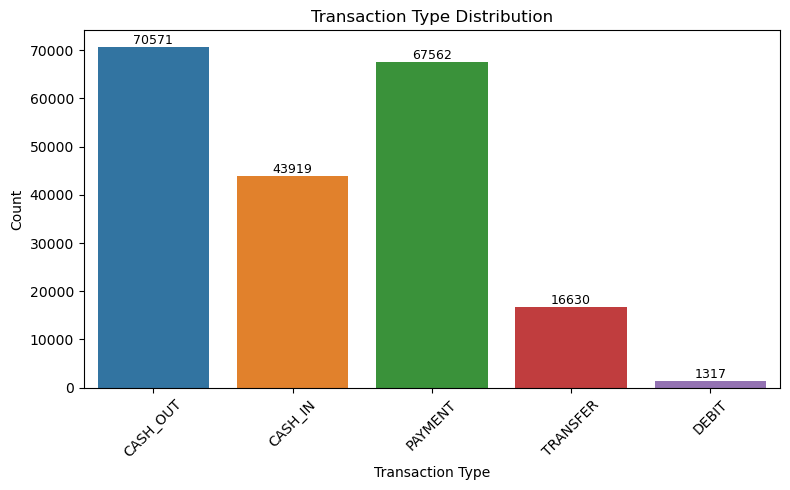

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plot = sns.countplot(x="transactiontype", data=df)

plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    plot.text(
        p.get_x() + p.get_width() / 2, 
        height + 1,                      
        int(height),                    
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


From above plot we can see that 'CASH_OUT' has highest amount of transactions whare as "DEBIT" is least.

Now we will see how many transactions are of fraudulent

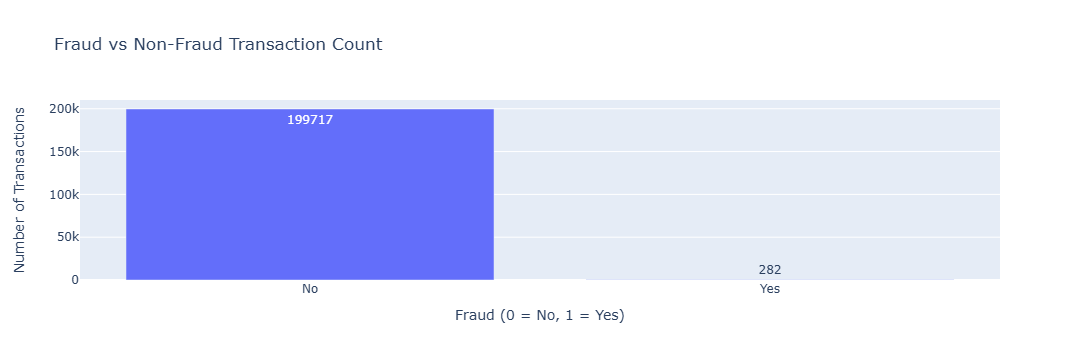

In [99]:
import plotly.express as px

fraud_counts = df['fraud'].value_counts().reset_index()
fraud_counts.columns = ['fraud', 'count'] 

fig = px.bar(fraud_counts,
             x='fraud',
             y='count',
             text='count',
             labels={'fraud': 'Fraud (0 = No, 1 = Yes)', 'count': 'Number of Transactions'},
             title='Fraud vs Non-Fraud Transaction Count')

fig.update_traces(textposition='auto') 
fig.show()


In this dataset, we analyzed the frequency of fraudulent and non-fraudulent transactions to understand the class imbalance.

Out of a total of 199,993 transactions, the distribution is as follows:

Non-Fraudulent Transactions: 199,711 (≈ 99.86%)

Fraudulent Transactions: 282 (≈ 0.14%)

This clearly indicates a highly imbalanced dataset, where fraudulent transactions represent a very small fraction of the total. Such imbalance is common in fraud detection problems and poses challenges for machine learning models, which can become biased toward the majority class (non-fraudulent).

From this we understood that there are dome fraud activities recorded. Let's explore at what time step most frauds occur.

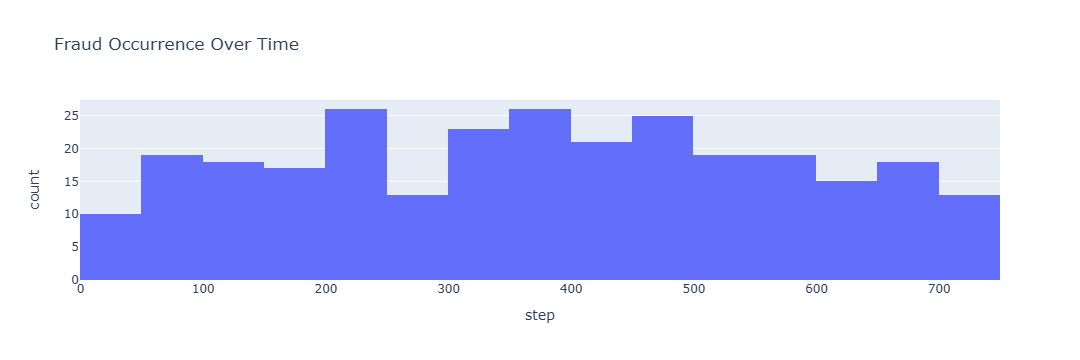

In [136]:
fig = px.histogram(
    df[df['fraud'] == 'Yes'],
    x='step',
    title='Fraud Occurrence Over Time'
)
fig.show()

Now let's move further and understand distribution of transaction amounts.

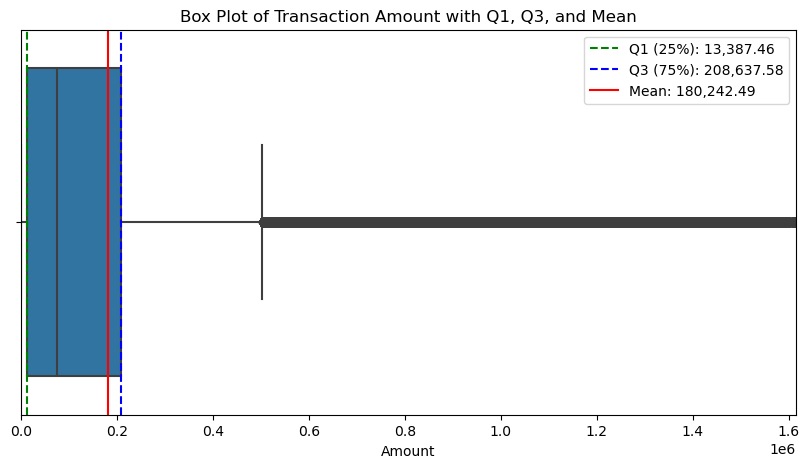

In [124]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount'])
plt.title("Box Plot of Transaction Amount with Q1, Q3, and Mean")
plt.xlabel("Amount")

# Calculate statistics
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
mean_val = df['amount'].mean()

# Draw vertical lines for Q1, Q3, and mean
plt.axvline(Q1, color='green', linestyle='--', label=f'Q1 (25%): {Q1:,.2f}')
plt.axvline(Q3, color='blue', linestyle='--', label=f'Q3 (75%): {Q3:,.2f}')
plt.axvline(mean_val, color='red', linestyle='-', label=f'Mean: {mean_val:,.2f}')

# Limit x-axis to remove extreme outliers
plt.xlim(0, df['amount'].quantile(0.99))

# Show legend
plt.legend()
plt.show()

Q1 (₹13.3k) means 25% of transactions are below ₹13,387.46 — indicating that a large number of transactions are small in value.

Q3 (₹2.08L) shows that 75% of the transactions are below ₹2,08,242.58. This tells us that only the top 25% of transactions are large transfers.

The mean (₹1.80L) lies between Q1 and Q3 but is closer to Q3, suggesting a right-skewed distribution — likely caused by a few very high-value outliers pulling the average up.

The wide gap between Q1 and Q3 (interquartile range or IQR ≈ ₹1.95L) indicates high variability in transaction amounts.

The mean > median pattern typically confirms positive skewness — i.e., most values are low, but a few very high transactions inflate the mean.

Box plots with Q1, Q3, and mean marked visually reinforce this trend, showing that the bulk of transactions are relatively small, while outliers extend far right.

Check relationships between numerical features

Text(0.5, 1.0, 'Correlation Between Numeric Features')

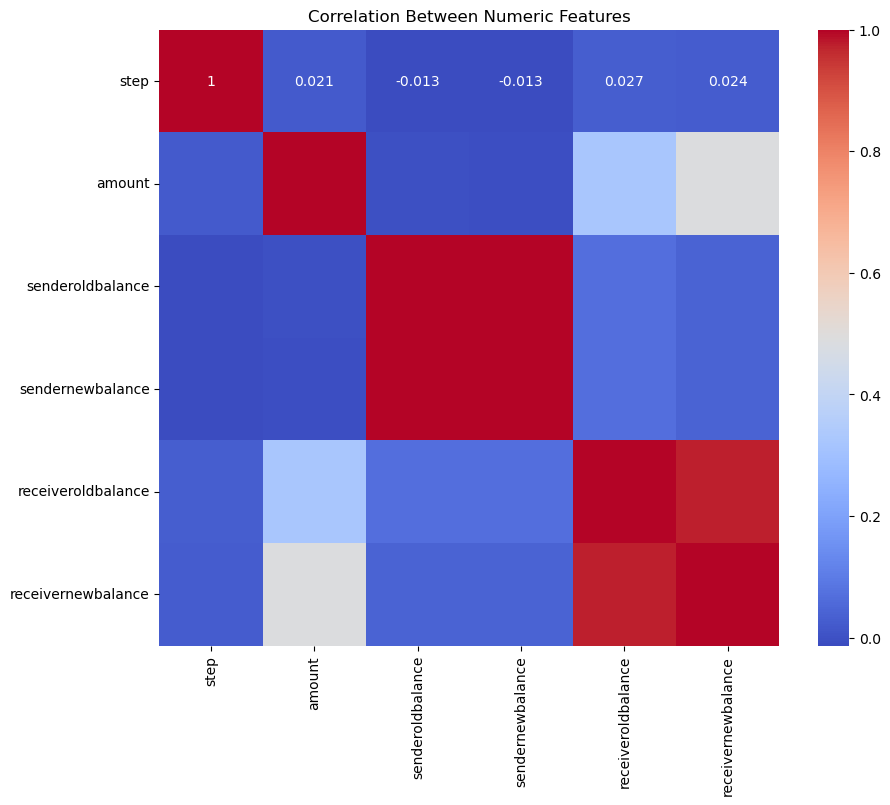

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")

By tracking how sender and receiver balances change, how transaction types behave, and comparing them against fraud labels, we can detect patterns that are not always visible directly but emerge when column relationships are analyzed together.

This detailed feature understanding is crucial before building any machine learning fraud detection model.